# Latent Representation

## Preamble

In [54]:
%matplotlib notebook
%load_ext autoreload 
%autoreload 2

import os
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import IPython.display as ipd
import matplotlib.ticker as ticker

from pathlib import Path
import numpy as np

import torch.utils.data.dataloader

import src.models.predict_model as predict
import src.data.load_dataset
import src.data.make_dataset

from src.config.load_config import load_config
from src.visualization.visualize import animate_signal_pairs
from src.common import merge_into_flat_one

plt.rcParams['animation.ffmpeg_path'] = 'ffmpeg'

project_dir = Path(predict.__file__).resolve().parents[2]
os.chdir(project_dir)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create Custom, Non-Random Data

Phase will vary, and nothing else.

In [40]:
data_path = Path('data/processed')
experiment_cfg_path = Path('config/experiment.json')
data_cfg_path = Path('config/data_generator.json')

# config loader
cfg = load_config(experiment_cfg_path) 
cfg_data = load_config(data_cfg_path)
N = cfg_data['N']

amplitudes = np.mean(cfg_data['amplitude_range'])
frequencies = np.mean(cfg_data['frequency_range'])
phases = np.linspace(cfg_data['phase_range'][0],cfg_data['phase_range'][1],N)[:,None]

# data loader
t, sinusoids = src.data.make_dataset.generate_sinusoids(frequencies, amplitudes, phases, **cfg_data)
test_dataset = src.data.load_dataset.OnTheFlyDataset(sinusoids)
test_loader = torch.utils.data.dataloader.DataLoader(dataset=test_dataset, **cfg['test_loader'])

# model
model_save_name = "{}_{}".format(cfg['experiment']['name'], cfg['model']['name'])
model_save_path = project_dir / cfg['model']['path'] / model_save_name 
print(model_save_path)

/home/ege/Documents/ThesisExperiment/toy_vae_example/models/epoch_10_batch_50_ae_3layer_relu.pt


## Run Inference

In [46]:
predictor = predict.Prediction(cfg['model'], model_save_path, **cfg['training'])
results = predictor.predict(test_loader)
results_latent = predictor.to_latent_space(test_loader)



## Display Input & Output Together

<IPython.core.display.Javascript object>


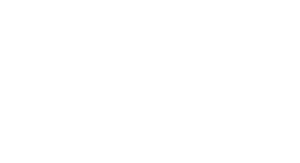

In [44]:
inputs = [x.numpy() for x in test_loader]
anim = animate_signal_pairs(t, inputs, results)
video = anim.to_html5_video()
html = ipd.HTML(video)
ipd.display(html)


## Explore Learned Representation against Phase

<IPython.core.display.Javascript object>


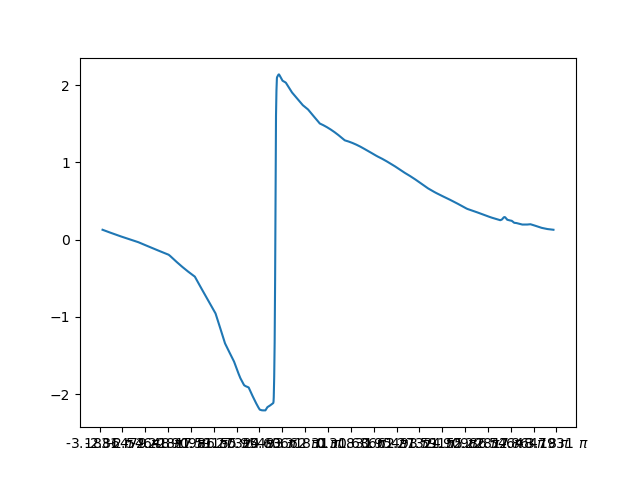

In [58]:
latent = merge_into_flat_one(results_latent)
plt.figure()
ax = plt.axes()
plt.plot(phases, latent)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1/np.pi))
plt.show()

In [51]:
print()

[0.12699449 0.12595397 0.12485357 ... 0.1287199  0.128069   0.12705426]
